# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Выполнил: Усеинов Булат 772
> кафедра АД Яндекс

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
X = dataset[:, :-1].astype(int)
y = dataset[:, -1]

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,602,100,51,109,231,70,11,220,30,25,163,238,722,206,73,11,19,189,198
1,156,85,36,78,149,55,7,147,45,19,128,168,321,134,64,10,24,197,203
2,540,92,45,74,187,74,7,157,41,19,143,179,375,183,70,8,6,195,201
3,293,93,36,63,139,57,8,132,50,18,136,158,260,121,67,3,27,193,201
4,814,85,43,66,123,55,7,150,45,19,146,172,326,173,83,4,15,180,183
5,259,98,58,101,208,65,12,226,30,25,182,225,748,216,71,6,1,185,196
6,746,91,42,66,142,58,9,134,50,18,142,163,268,164,69,6,5,191,197
7,745,85,43,69,141,62,7,152,44,19,145,178,341,179,84,1,4,181,184
8,237,85,45,65,128,56,8,151,45,19,145,170,332,186,81,1,10,179,184
9,739,96,44,85,166,66,10,155,43,19,150,167,355,159,67,3,10,192,202


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.375228,93.970856,45.151184,83.014572,170.448087,61.723133,8.570128,170.848816,40.489982,20.739526,148.626594,190.238616,450.524590,176.198543,72.382514,6.291439,13.074681,188.939891,195.692168
std,246.546093,8.190427,6.267814,15.853336,33.272536,7.787309,4.369885,33.857916,7.888039,2.654617,14.809154,32.030829,180.735132,33.493364,7.131670,4.889541,8.821211,6.162492,7.366448
min,1.000000,77.000000,34.000000,42.000000,105.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,215.000000,87.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,150.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,414.000000,93.000000,45.000000,81.000000,170.000000,62.000000,8.000000,159.000000,42.000000,20.000000,147.000000,181.000000,371.000000,174.000000,72.000000,5.000000,11.000000,189.000000,197.000000
75%,645.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,218.000000,605.000000,201.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,116.000000,59.000000,112.000000,322.000000,133.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,119.000000,22.000000,39.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

> Кодирую таргет с помощью LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [8]:
le.classes_

array(['bus', 'opel', 'saab', 'van'], dtype=object)

In [9]:
y = le.transform(y)
y_test = le.transform(y_test)
y_train = le.transform(y_train)

> Классы сбалансированны

In [10]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3]), array([218, 212, 217, 199]))

In [78]:
# import pandas_profiling

In [79]:
# pandas_profiling.ProfileReport(pd.DataFrame(X))

> Признак 0 - просто индекс строки, поэтому удаляю этот признак.

In [13]:
X = X[:, 1:]

In [14]:
X_test = X_test[:, 1:]
X_train = X_train[:, 1:]

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

> Т.к. метод оптимизации функционала метода логистической регрессии это градиентный метод, то очень важно в процессе CV нормализовать данные НЕЗАВИСИМО на train и test.

In [15]:
from sklearn.pipeline import Pipeline

In [16]:
import warnings
warnings.simplefilter(action = 'ignore')

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [21]:
def cv_lr(params):
    params['multi_class'] = 'multinomial'
    params['solver'] = 'saga'
    params['tol'] = 1e-3
    params['max_iter'] = 500
    params['random_state'] = 1568
    
    kf = KFold(n_splits=5, shuffle=True, random_state=1568)
    lr = LogisticRegression(**params)
    
    pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', lr)
    ])

    return cross_val_score(pipeline, X_train, y_train, cv=kf, n_jobs=5, scoring='f1_macro').mean()

check_params = {
    'penalty': hp.choice('penalty', ['l1', 'l2']),
    'C': hp.quniform('C', 0, 2, 0.0005)
}

def f(params):
    acc = cv_lr(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, check_params, algo=tpe.suggest, max_evals=200, trials=trials)
print('best:')
print(best)

100%|██████████| 200/200 [00:26<00:00,  7.54trial/s, best loss: -0.7792062997020384]
best:
{'C': 1.6695, 'penalty': 0}


In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=1568)

In [23]:
params = {}
params['C'] = 1.9115
params['penalty'] = 'l1'
params['multi_class'] = 'multinomial'
params['solver'] = 'saga'
params['tol'] = 1e-3
params['max_iter'] = 500
params['random_state'] = 1568

In [24]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression(**params))
    ])

In [25]:
cv_lr_scores = cross_validate(pipeline, X_train, y_train, cv=kf, n_jobs=5, scoring=['accuracy', 'f1_macro'])

In [26]:
acc_lr = cv_lr_scores["test_accuracy"]
f1_macro_lr = cv_lr_scores["test_f1_macro"]

print(f'CV-train accuracy: {round(acc_lr.mean(), 3):3} | std: {round(acc_lr.std(), 3)}')
print(f'CV-train F1 macro: {round(f1_macro_lr.mean(), 3):3} | std: {round(f1_macro_lr.std(), 3)}')

CV-train accuracy: 0.776 | std: 0.055
CV-train F1 macro: 0.775 | std: 0.045


In [27]:
from scikitplot.metrics import plot_roc, plot_precision_recall_curve
import matplotlib.pyplot as plt

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.9115, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l1', random_state=1568,
                                    solver='saga', tol=0.001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [29]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        78
           1       0.62      0.59      0.61        68
           2       0.68      0.64      0.66        78
           3       0.91      0.99      0.95        73

    accuracy                           0.79       297
   macro avg       0.78      0.79      0.78       297
weighted avg       0.78      0.79      0.79       297



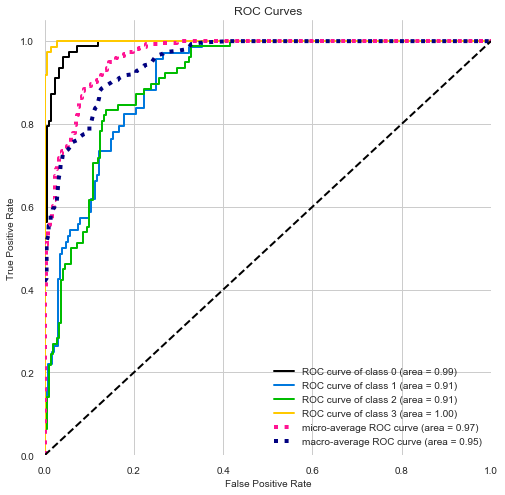

In [37]:
plot_roc(y_test, pipeline.predict_proba(X_test), figsize=(8, 8))
plt.grid()
plt.show();

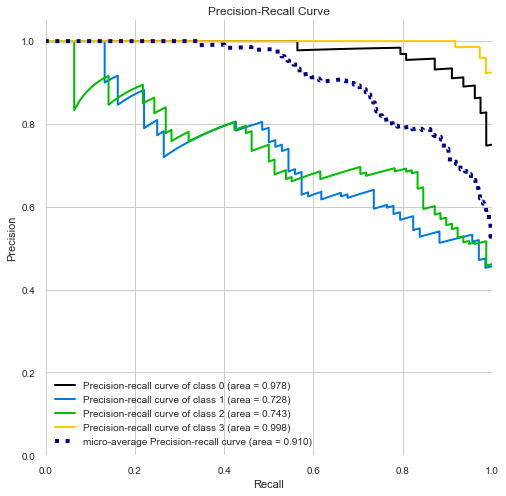

In [38]:
plot_precision_recall_curve(y_test, pipeline.predict_proba(X_test), figsize=(8, 8))
plt.grid()
plt.show();

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

> Очень важно нормализовать данные перед PCA!

In [39]:
from sklearn.decomposition import PCA

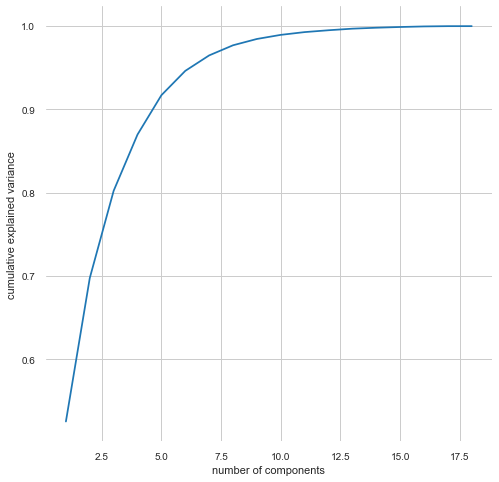

In [40]:
pca = PCA().fit(StandardScaler().fit_transform(X_train))
plt.figure(figsize=(8, 8))
plt.plot(np.arange(1, X_train.shape[1]+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid();

In [41]:
np.cumsum(pca.explained_variance_ratio_)

array([0.52524868, 0.69756054, 0.80226862, 0.86984886, 0.91707146,
       0.9462795 , 0.96485643, 0.97701568, 0.98459393, 0.98952338,
       0.99284173, 0.99506842, 0.99695999, 0.99809065, 0.99896595,
       0.99965582, 0.99998084, 1.        ])

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

> Чтобы сохранить высокую дисперсию возьму 14 компонент

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [42]:
def cv_lr(params):
    params['multi_class'] = 'multinomial'
    params['solver'] = 'saga'
    params['tol'] = 1e-3
    params['max_iter'] = 500
    params['random_state'] = 1568
    
    kf = KFold(n_splits=5, shuffle=True, random_state=1568)
    lr = LogisticRegression(**params)
    
    pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=14)),
    ('clf', lr)
    ])

    return cross_val_score(pipeline, X_train, y_train, cv=kf, n_jobs=4, scoring='f1_macro').mean()

check_params = {
    'penalty': hp.choice('penalty', ['l1', 'l2']),
    'C': hp.quniform('C', 0, 2, 0.0005),
    'max_iter': hp.quniform('max_iter', 200, 2000, 100)
    
}

def f(params):
    acc = cv_lr(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, check_params, algo=tpe.suggest, max_evals=300, trials=trials)
print('best:')
print(best)

100%|██████████| 300/300 [00:53<00:00,  5.57trial/s, best loss: -0.7630872213078114]
best:
{'C': 1.917, 'max_iter': 1300.0, 'penalty': 0}


In [43]:
kf = KFold(n_splits=5, shuffle=True, random_state=1568)

In [44]:
params = {}
params['C'] = 1.8645
params['penalty'] = 'l1'
params['multi_class'] = 'multinomial'
params['solver'] = 'saga'
params['tol'] = 1e-3
params['max_iter'] = 1800
params['random_state'] = 1568

In [45]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=14)),
    ('clf', LogisticRegression(**params))
    ])

In [46]:
cv_lr_pca_scores = cross_validate(pipeline, X_train, y_train, cv=kf, n_jobs=5, scoring=['accuracy', 'f1_macro'])

In [47]:
acc_lr_pca = cv_lr_pca_scores["test_accuracy"]
f1_macro_lr_pca = cv_lr_pca_scores["test_f1_macro"]

print(f'CV-train accuracy: {round(acc_lr_pca.mean(), 3):3} | std: {round(acc_lr_pca.std(), 3)}')
print(f'CV-train F1 macro: {round(f1_macro_lr_pca.mean(), 3):3} | std: {round(f1_macro_lr_pca.std(), 3)}')

CV-train accuracy: 0.761 | std: 0.048
CV-train F1 macro: 0.761 | std: 0.036


In [48]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 LogisticRegression(C=1.8645, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1800,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l1', random_state=1568,
                                    solver='saga', tol=0.001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [49]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        78
           1       0.60      0.62      0.61        68
           2       0.68      0.59      0.63        78
           3       0.91      1.00      0.95        73

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297



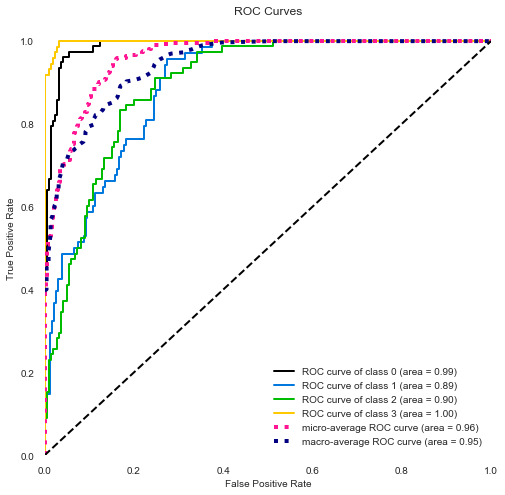

In [50]:
plot_roc(y_test, pipeline.predict_proba(X_test), figsize=(8, 8))
plt.show()

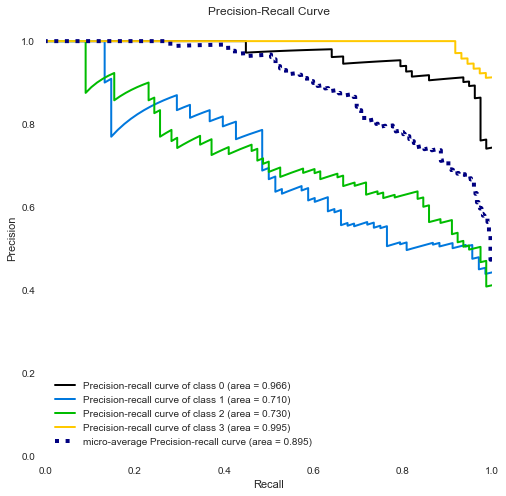

In [51]:
plot_precision_recall_curve(y_test, pipeline.predict_proba(X_test), figsize=(8, 8))
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [52]:
from sklearn.tree import DecisionTreeClassifier

def cv_tree(params):
    
    params['random_state'] = 1568
    
    kf = KFold(n_splits=5, shuffle=True, random_state=1568)
    tree = DecisionTreeClassifier(**params)
    
    pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=14)),
    ('clf', tree)
    ])

    return cross_val_score(pipeline, X_train, y_train, cv=kf, n_jobs=4, scoring='f1_macro').mean()

check_params = {
    'max_depth': hp.quniform('max_depth', 3, 30, 1)
}

def f(params):
    acc = cv_tree(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, check_params, algo=tpe.suggest, max_evals=40, trials=trials)
print('best:')
print(best)

100%|██████████| 40/40 [00:02<00:00, 18.78trial/s, best loss: -0.6421847784688876]
best:
{'max_depth': 7.0}


In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=1568)

In [54]:
params = {}
params['max_depth'] = 11
params['random_state'] = 1568

In [55]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=14)),
    ('clf', DecisionTreeClassifier(**params))
    ])

In [56]:
cv_tree_scores = cross_validate(pipeline, X_train, y_train, cv=kf, n_jobs=5, scoring=['accuracy', 'f1_macro'])

In [57]:
acc_tree = cv_tree_scores["test_accuracy"]
f1_tree = cv_tree_scores["test_f1_macro"]

print(f'CV-train accuracy: {round(acc_tree.mean(), 3):3} | std: {round(acc_tree.std(), 3)}')
print(f'CV-train F1 macro: {round(f1_tree.mean(), 3):3} | std: {round(f1_tree.std(), 3)}')

CV-train accuracy: 0.621 | std: 0.033
CV-train F1 macro: 0.623 | std: 0.014


In [58]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=11, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=1568,
                                        splitter='best'))],
         verbose=False

In [59]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        78
           1       0.52      0.51      0.52        68
           2       0.59      0.64      0.61        78
           3       0.70      0.71      0.71        73

    accuracy                           0.66       297
   macro avg       0.66      0.65      0.65       297
weighted avg       0.66      0.66      0.66       297



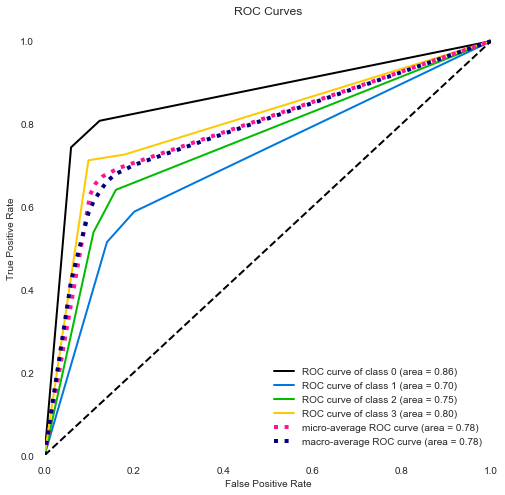

In [60]:
plot_roc(y_test, pipeline.predict_proba(X_test), figsize=(8, 8))
plt.show()

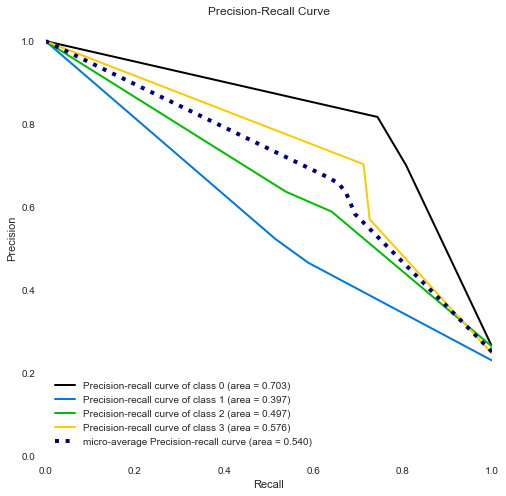

In [61]:
plot_precision_recall_curve(y_test, pipeline.predict_proba(X_test), figsize=(8, 8))
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [62]:
from tqdm import tqdm_notebook

In [63]:
from sklearn.ensemble import BaggingClassifier

In [64]:
kf = KFold(n_splits=5, shuffle=True, random_state=1568)

params = {}
params['C'] = 1.8645
params['penalty'] = 'l1'
params['multi_class'] = 'multinomial'
params['solver'] = 'saga'
params['tol'] = 1e-3
params['max_iter'] = 1800

In [65]:
metrics = {
    'accuracy': [],
    'f1_macro': []
}

for i in tqdm_notebook(range(2, 100, 5)):
    pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=14)),
    ('clf', BaggingClassifier(n_estimators=i, base_estimator=LogisticRegression(**params), n_jobs=-1))
    ])

    cv_bagg_lr = cross_validate(pipeline, X_train, y_train, cv=kf, n_jobs=5, scoring=['accuracy', 'f1_macro'])
    
    metrics['accuracy'].append(cv_bagg_lr['test_accuracy'].mean())
    metrics['f1_macro'].append(cv_bagg_lr['test_f1_macro'].mean())

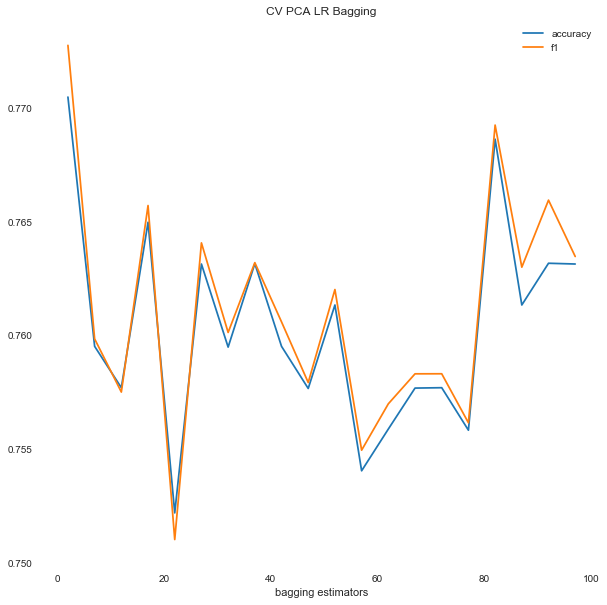

In [66]:
plt.figure(figsize=(10, 10))
plt.title('CV PCA LR Bagging')
plt.plot(np.arange(2, 100, 5), metrics['accuracy'], label='accuracy')
plt.plot(np.arange(2, 100, 5), metrics['f1_macro'], label='f1')
plt.xlabel('bagging estimators')
plt.legend()
plt.show()

> Оптимальный размер бэггинга - опеределить сложно. Можно заметить, что с ростом числа Лог регрессий в бэггинге они не становятся менее скоррелированными. Из-за этого эффективность бэггинга нестабильна и начинает падать

In [67]:
kf = KFold(n_splits=5, shuffle=True, random_state=1568)

params = {}
params['max_depth'] = 11

metrics = {
    'accuracy': [],
    'f1_macro': []
}

for i in range(2, 100, 5):
    pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=14)),
    ('clf', BaggingClassifier(n_estimators=i, base_estimator=DecisionTreeClassifier(**params), n_jobs=-1))
    ])

    cv_bagg_lr = cross_validate(pipeline, X_train, y_train, cv=kf, n_jobs=5, scoring=['accuracy', 'f1_macro'])
    
    metrics['accuracy'].append(cv_bagg_lr['test_accuracy'].mean())
    metrics['f1_macro'].append(cv_bagg_lr['test_f1_macro'].mean())

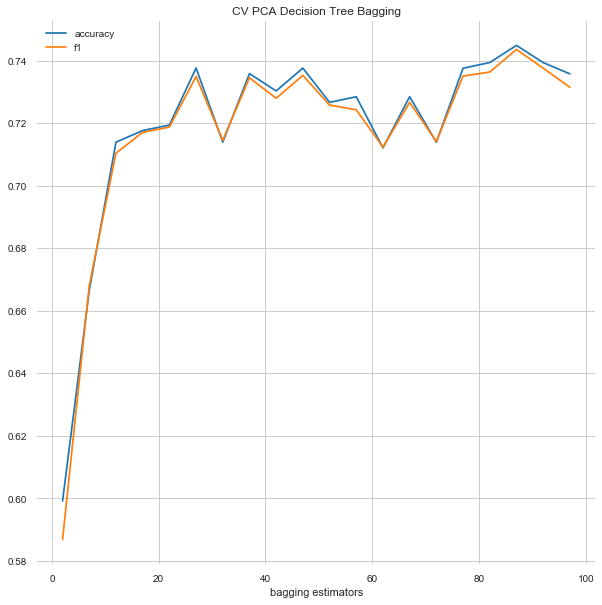

In [68]:
plt.figure(figsize=(10, 10))
plt.title('CV PCA Decision Tree Bagging')
plt.plot(np.arange(2, 100, 5), metrics['accuracy'], label='accuracy')
plt.plot(np.arange(2, 100, 5), metrics['f1_macro'], label='f1')
plt.xlabel('bagging estimators')
plt.legend()
plt.grid()
plt.show()

> Оптимальный размер бэггинга - 90. Заметим, что с ростом размера бэггинга наши деревья получаются разными, тем самым понижают разброс ошибки

> Я думаю, что оптимальные гиперпараметры решающего дерева не подходят для ансамбля. В ансамбле мы хотим получить максимально несмещённые нескоррелированные деревья, чтобы тем самым понизить разброс ошибки. То есть, деревья, как минимум, должны быть глубже

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
kf = KFold(n_splits=5, shuffle=True, random_state=1568)

params = {}
params['max_depth'] = 11
params['n_jobs'] = -1

metrics = {
    'accuracy': [],
    'f1_macro': []
}

for i in tqdm_notebook(range(2, 400, 5)):
    params['n_estimators'] = i
    
    pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=14)),
    ('clf', RandomForestClassifier(**params))
    ])

    cv_bagg_lr = cross_validate(pipeline, X_train, y_train, cv=kf, n_jobs=5, scoring=['accuracy', 'f1_macro'])
    
    metrics['accuracy'].append(cv_bagg_lr['test_accuracy'].mean())
    metrics['f1_macro'].append(cv_bagg_lr['test_f1_macro'].mean())

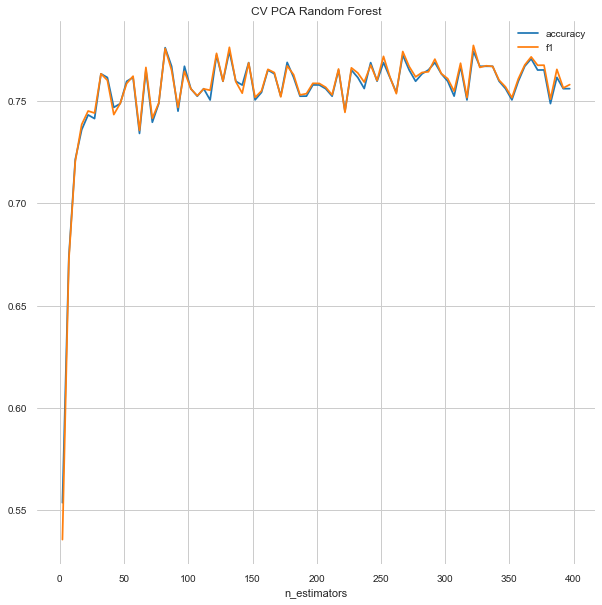

In [71]:
plt.figure(figsize=(10, 10))
plt.title('CV PCA Random Forest')
plt.plot(np.arange(2, 400, 5), metrics['accuracy'], label='accuracy')
plt.plot(np.arange(2, 400, 5), metrics['f1_macro'], label='f1')
plt.xlabel('n_estimators')
plt.legend()
plt.grid()
plt.show()

> Оптимальное число деревьев - определить сложно скорее можно брать число деревьев после трешхолда (в данном случае ~150). Можно заметить, что увеличение количества деревьев не влияет на переобучение нашей модели.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [72]:
X_train.shape[0] / 10

54.9

In [73]:
pipeline_lr = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=14)),
    ('clf', LogisticRegression(C=1.8645, penalty='l1', multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1800))
    ])

pipeline_tree = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=14)),
    ('clf', DecisionTreeClassifier(max_depth=11))
    ])

pipeline_rf = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=14)),
    ('clf', RandomForestClassifier(max_depth=11, n_estimators=210))
    ])

In [74]:
metrics_lr = {
    'accuracy': [],
    'f1_macro': [] 
    }
    
metrics_tree = {
    'accuracy': [],
    'f1_macro': [] 
    }
    
metrics_rf = {
    'accuracy': [],
    'f1_macro': [] 
    }
    
for i in range(1, 11):
    X_train_shaped, y_train_shaped = X_train[:i*55], y_train[:i*55]
    
    pipeline_lr.fit(X_train_shaped, y_train_shaped)
    pipeline_tree.fit(X_train_shaped, y_train_shaped)
    pipeline_rf.fit(X_train_shaped, y_train_shaped)
    
    metrics_lr['accuracy'].append(accuracy_score(y_test, pipeline_lr.predict(X_test)))
    metrics_lr['f1_macro'].append(f1_score(y_test, pipeline_lr.predict(X_test), average='macro'))
    
    metrics_tree['accuracy'].append(accuracy_score(y_test, pipeline_tree.predict(X_test)))
    metrics_tree['f1_macro'].append(f1_score(y_test, pipeline_tree.predict(X_test), average='macro'))
    
    metrics_rf['accuracy'].append(accuracy_score(y_test, pipeline_rf.predict(X_test)))
    metrics_rf['f1_macro'].append(f1_score(y_test, pipeline_rf.predict(X_test), average='macro'))

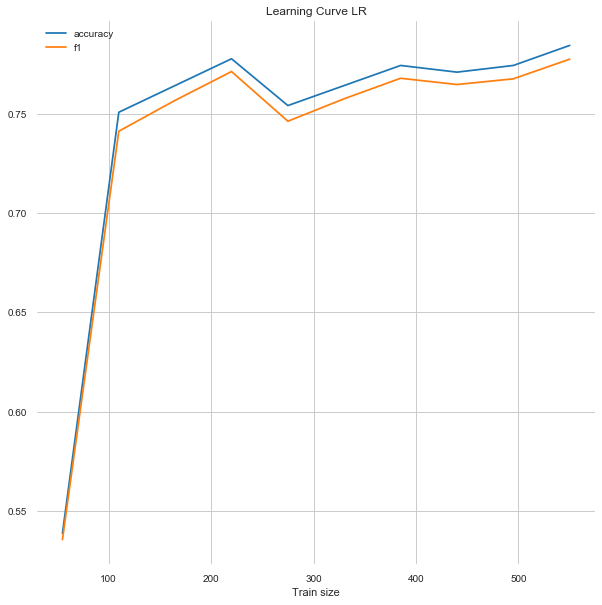

In [75]:
plt.figure(figsize=(10, 10))
plt.title('Learning Curve LR')
plt.plot([55 * i for i in range(1, 11)], metrics_lr['accuracy'], label='accuracy')
plt.plot([55 * i for i in range(1, 11)], metrics_lr['f1_macro'], label='f1')
plt.xlabel('Train size')
plt.legend()
plt.grid()
plt.show()

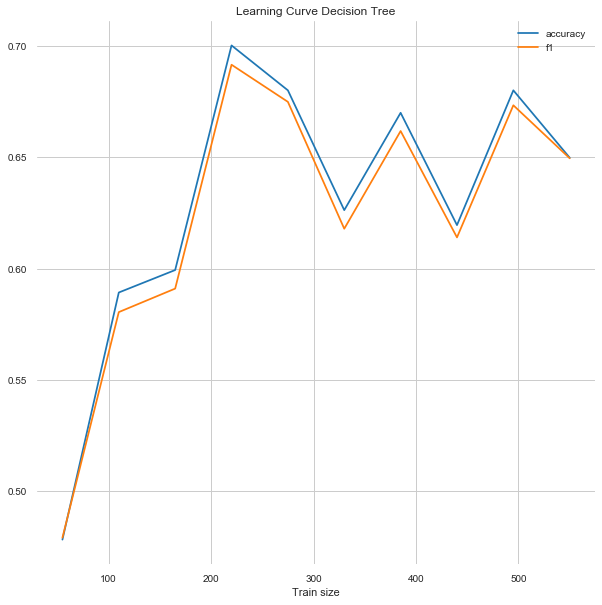

In [76]:
plt.figure(figsize=(10, 10))
plt.title('Learning Curve Decision Tree')
plt.plot([55 * i for i in range(1, 11)], metrics_tree['accuracy'], label='accuracy')
plt.plot([55 * i for i in range(1, 11)], metrics_tree['f1_macro'], label='f1')
plt.xlabel('Train size')
plt.legend()
plt.grid()
plt.show()

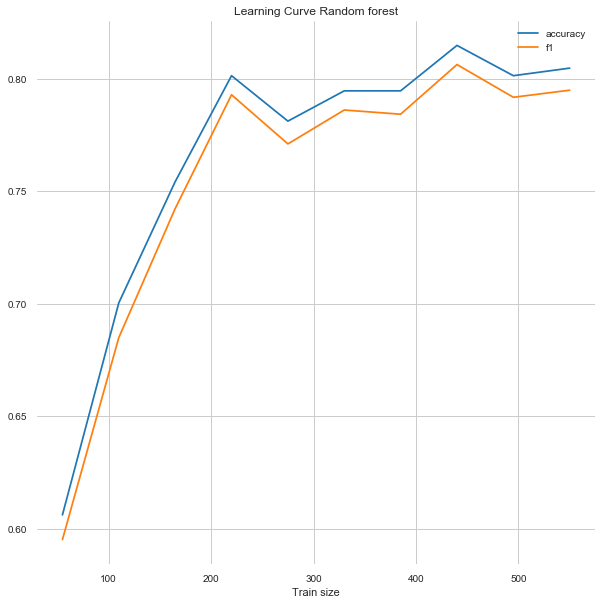

In [77]:
plt.figure(figsize=(10, 10))
plt.title('Learning Curve Random forest')
plt.plot([55 * i for i in range(1, 11)], metrics_rf['accuracy'], label='accuracy')
plt.plot([55 * i for i in range(1, 11)], metrics_rf['f1_macro'], label='f1')
plt.xlabel('Train size')
plt.legend()
plt.grid()
plt.show()

> Чем больше наша обучающая выборка, тем больше обобщающая способность модели.